# 引入必要的库

In [ ]:
import matplotlib.pyplot as plt

# 1. 定义 Hénon Map 函数

In [2]:
def compute_henon(a, b, u0, N):
    """
    Compute the Hénon map trajectory.
    
    Parameters:
    a (float): Coefficient a of the Hénon map.
    b (float): Coefficient b of the Hénon map.
    u0 (tuple): Initial value (x0, y0).
    N (int): Length of the trajectory.
    
    Returns:
    list: Trajectory of the Hénon map [u0, u1, u2, ..., uN].
    """
    trajectory = [u0]
    x, y = u0
    for _ in range(N):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        trajectory.append((x_new, y_new))
        x, y = x_new, y_new
    return trajectory

# 2. 计算经典Hénon map的轨迹
取a=1.4, b=0.3, u0=(0, 0)为初始值，计算经典Hénon map的轨迹，绘制在相空间中的轨迹。

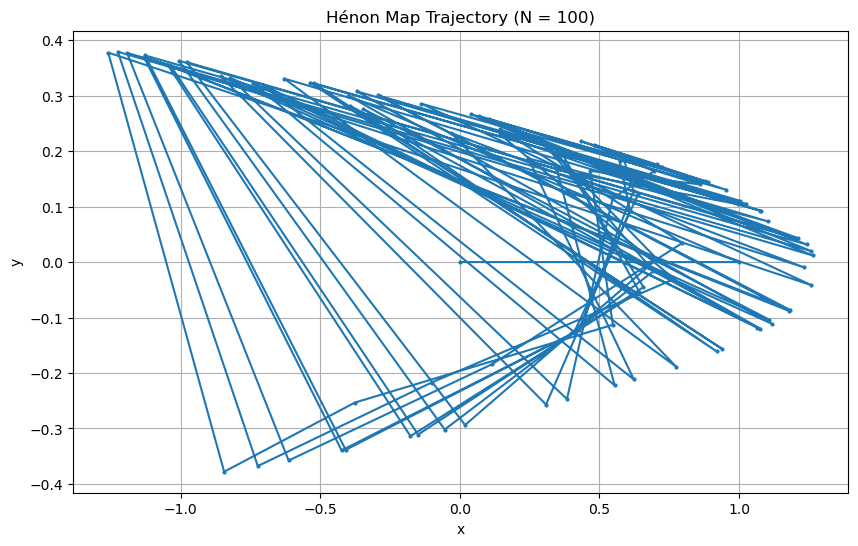

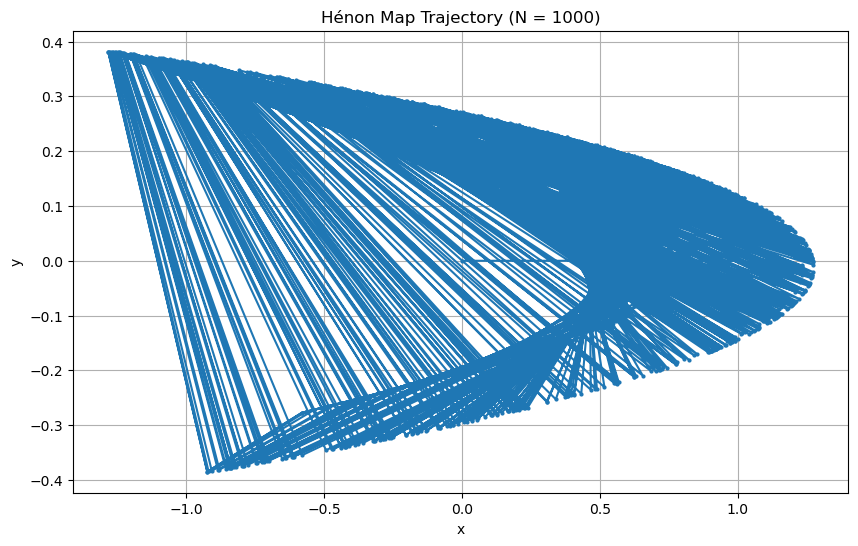

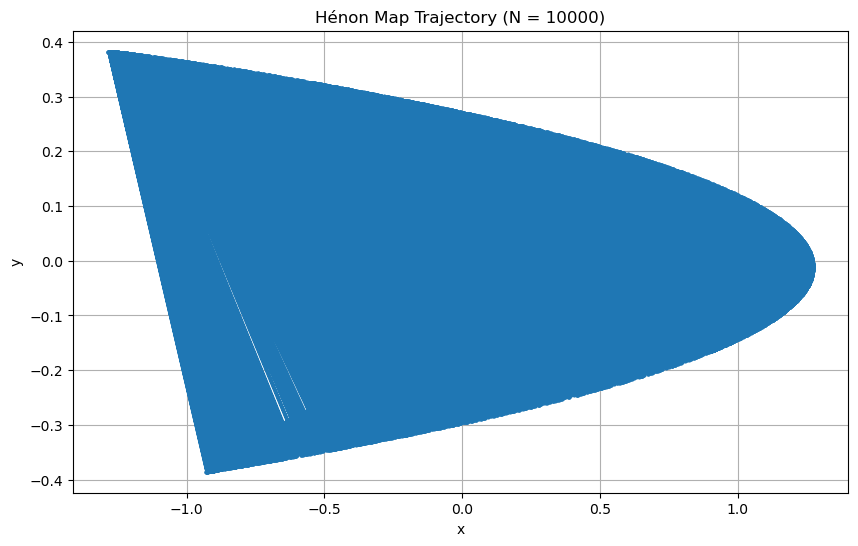

In [11]:
# Parameters for the classic Hénon map
a = 1.4
b = 0.3
u0 = (0, 0)
Ns = [100, 1000, 10000]

for N in Ns:
    # Compute the trajectory
    trajectory = compute_henon(a, b, u0, N)

    # Extract x and y coordinates
    xs, ys = zip(*trajectory)

    # Plot the trajectory
    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, marker='o', linestyle='-', markersize=2)
    plt.title(f'Hénon Map Trajectory (N = {N})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# 3. 计算Hénon map的orbit digram
固定 b=0.3 ，改变 a 后获得⼀系列 Hénon map的轨迹，然后以 a 为横轴， x 为纵轴绘制orbit digram图。

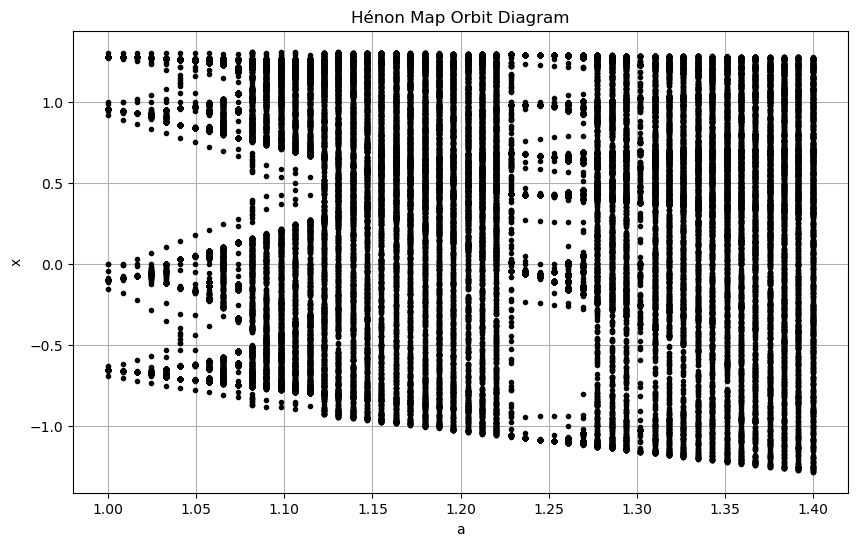

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b = 0.3
a_values = np.linspace(1.0, 1.4, 50)
u0 = (0, 0)
N = 1000

# Compute the Hénon map trajectories for a series of values of a
orbit_diagram = []

for a in a_values:
    trajectory = compute_henon(a, b, u0, N)
    xs, ys = zip(*trajectory)
    orbit_diagram.append(xs)  # Take the last 100 points to plot

# Plot the orbit diagram
plt.figure(figsize=(10, 6))
for i, a in enumerate(a_values):
    plt.plot([a] * len(xs), orbit_diagram[i], '.k', alpha=1)  # Plot points for each a

plt.title('Hénon Map Orbit Diagram')
plt.xlabel('a')
plt.ylabel('x')
plt.grid(True)
plt.show()

# 4. 找到收敛到周期性轨道的 a 值

Periodic orbit found for a = 1.0


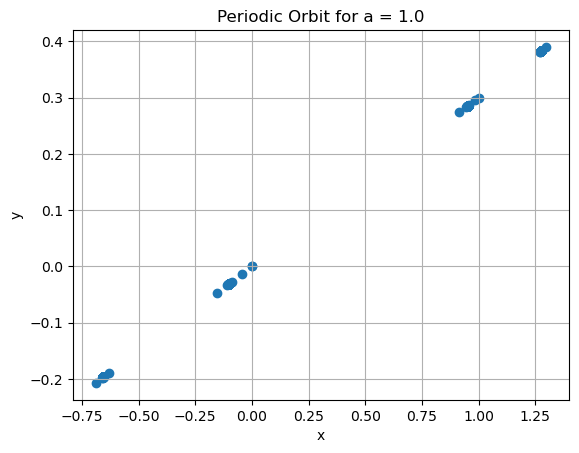

In [14]:
# Find and plot the periodic orbit
orbit_diagram[:10]

for a, xs in zip(a_values, orbit_diagram):
    ys = [b * x for x in xs]  # Compute ys based on xs and b
    for i in range(1, len(xs)):
        if np.isclose(xs[i], xs[0], atol=1e-5) and np.isclose(ys[i], ys[0], atol=1e-5):
            print(f'Periodic orbit found for a = {a}')
            plt.scatter(xs, ys)
            plt.title(f'Periodic Orbit for a = {a}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid(True)
            plt.show()

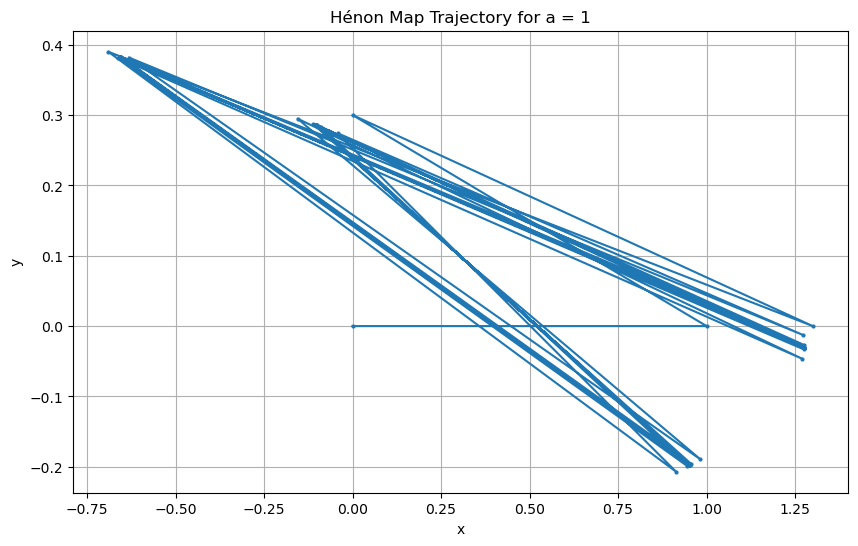

In [13]:
a_periodic = 1  
N = 10000
# Compute the trajectory for the specific value of a
trajectory_periodic = compute_henon(a_periodic, .3, u0, N)

# Extract x and y coordinates
xs_periodic, ys_periodic = zip(*trajectory_periodic)

# Plot the trajectory for the specific value of a
plt.figure(figsize=(10, 6))
plt.plot(xs_periodic, ys_periodic, marker='o', linestyle='-', markersize=2)
plt.title(f'Hénon Map Trajectory for a = {a_periodic}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

此时 即使设置N=10000，得到的轨迹也只有一个周期，说明轨迹已经收敛到一个周期性轨道。找到收敛到周期性轨道的 a 值。